<a href="https://colab.research.google.com/github/MennaKhaled2002/data-mining/blob/main/Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving HR-Employee-Attrition.csv to HR-Employee-Attrition.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline
plt.style.use("seaborn")

<ipython-input-2-bc738d1b817d>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Import the livraries that we are going to use for data visualizations

In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['HR-Employee-Attrition.csv']))
print(df)

      Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0       

In [ ]:
# the dataset and its fields

df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


# **Data understanding**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                


*   The dataset represents the HR records of employees which consists of 34 attribute as represented in the cell above
*   The attribute that we want to predict (the independent variable) is the attrition.

*   The size of the dataset is 1470 record










In [ ]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [ ]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Identifying the number of unique values will help us identifying field that have redudant values and therefore, will have no value in the analysis process and will be handled in the cleaning phase later on.

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

there are no null values within this dataset and this needs to be considered in the cleaning phase.

In [ ]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [ ]:
df['Attrition'].value_counts() / df['Attrition'].count()

Attrition
No     0.838776
Yes    0.161224
Name: count, dtype: float64

as represented the dataset is not balanced and this must be considered when evaluating the performance of the machine learning models and it will help us decide on the metrics to consider.

In [ ]:
df.duplicated().sum()

0

no duplicates in this dataset

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


these are the statistics of the dataset including the non-numeric attributes

In [ ]:
numeric_df = df.select_dtypes(include='number')

In [ ]:
numeric_df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [ ]:
numeric_df.drop(columns=['EmployeeCount','EmployeeNumber','StandardHours'], inplace=True)

since there is no correlation between EmployeeCount and any other variable and the same applies for the Standards hours and the reason is that employeeCount is the same for all of the records so there isn't a correlation that can be established, the same goes for standard hours. Employee number is just an identifier for the employee so no correlation is established in this case as well.

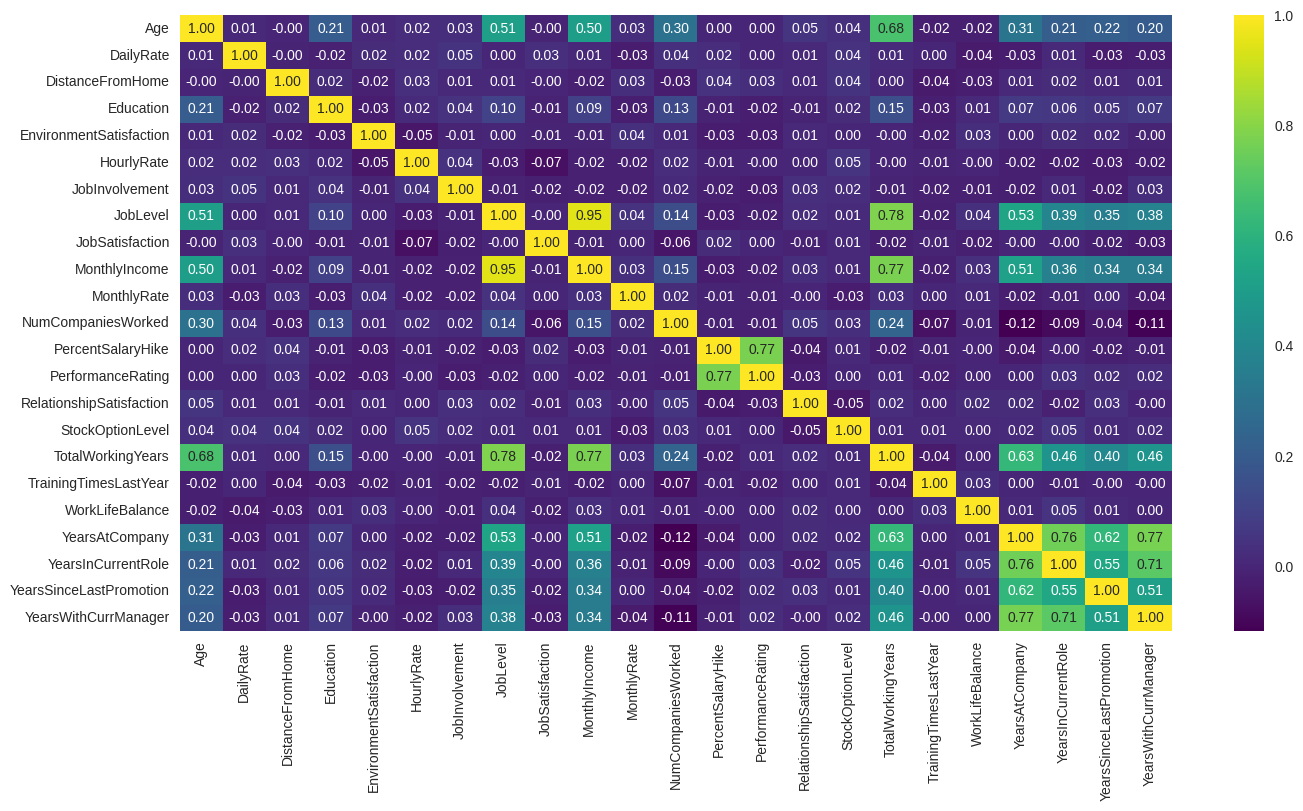

In [ ]:
plt.figure(figsize=(16, 8))  # Adjust width and height as needed
sns.heatmap(numeric_df.corr(), cmap='viridis', fmt=".2f", annot=True)
plt.show()

In [ ]:
df_copy=df.copy()
n=df_copy.select_dtypes(include='number')

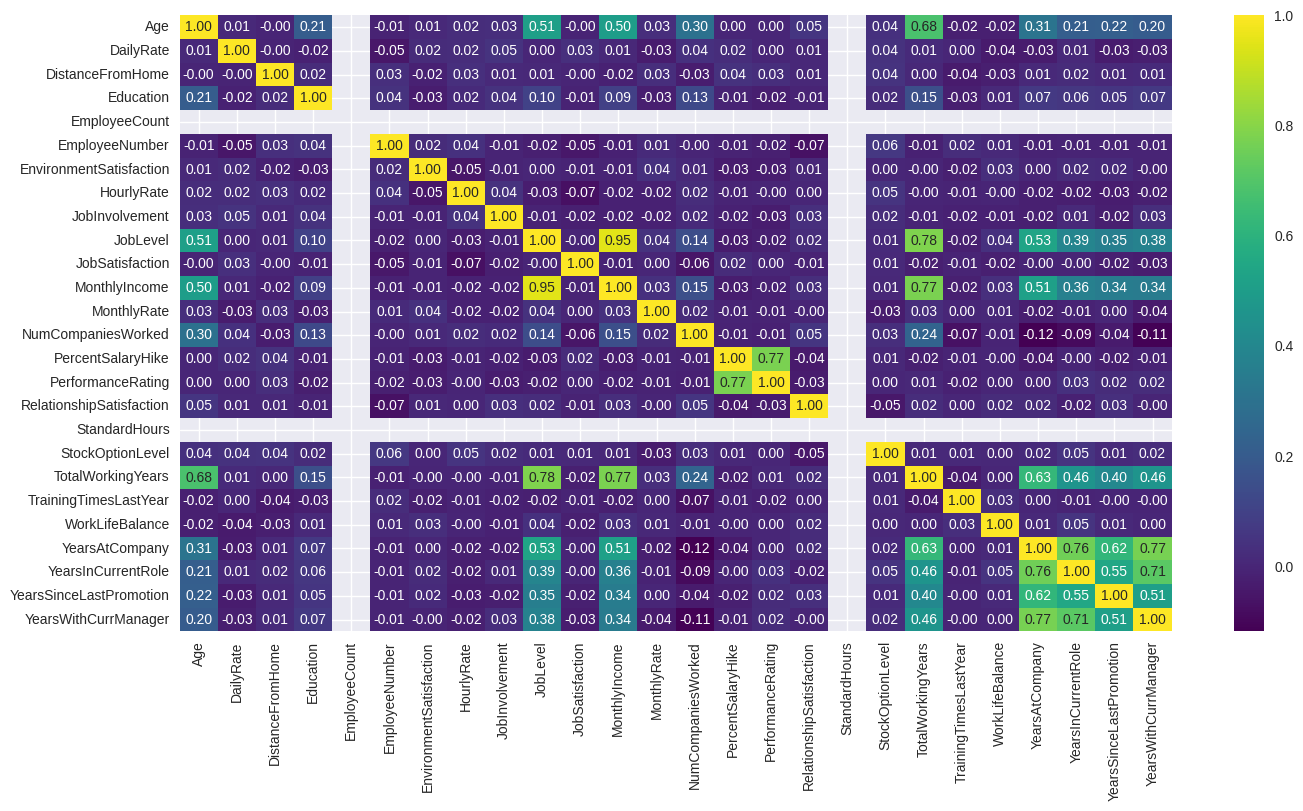

In [ ]:
plt.figure(figsize=(16, 8))  # Adjust width and height as needed
sns.heatmap(n.corr(), cmap='viridis', fmt=".2f", annot=True)
plt.show()

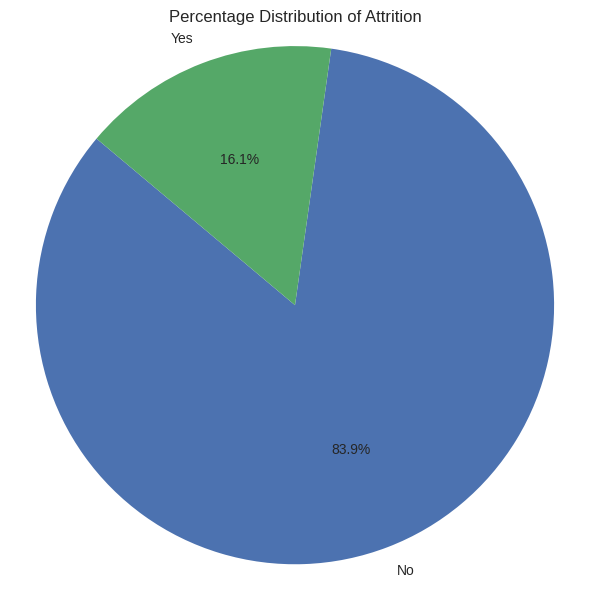

In [ ]:
attrition_percentage = df['Attrition'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(6, 6))
plt.pie(attrition_percentage, labels=attrition_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Attrition')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

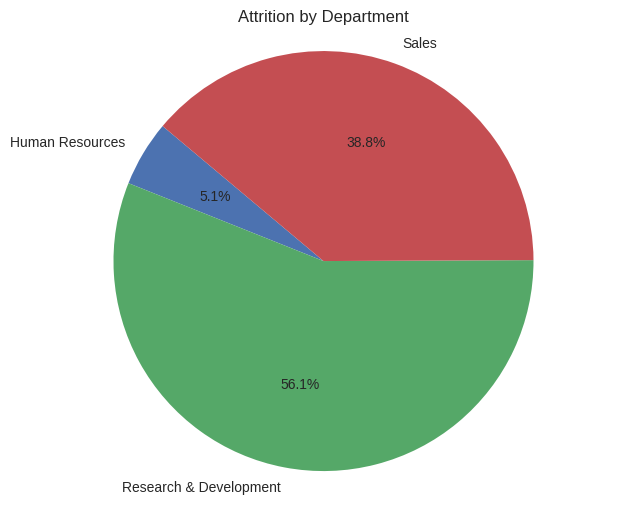

In [ ]:
attrition_counts = df.groupby('Department')['Attrition'].value_counts().unstack().fillna(0)
attrition_counts['Total'] = attrition_counts.sum(axis=1)

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(attrition_counts['Yes'], labels=attrition_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Attrition by Department')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

From this we can deduce that Research and development has the highest attrition rate followed by sales and last but not least the human resources department

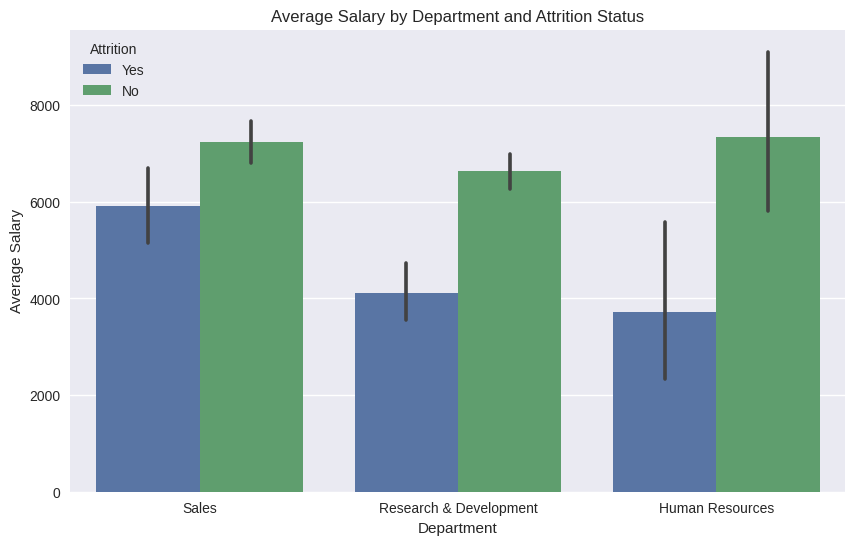

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='MonthlyIncome', hue='Attrition', data=df)
plt.title('Average Salary by Department and Attrition Status')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.show()

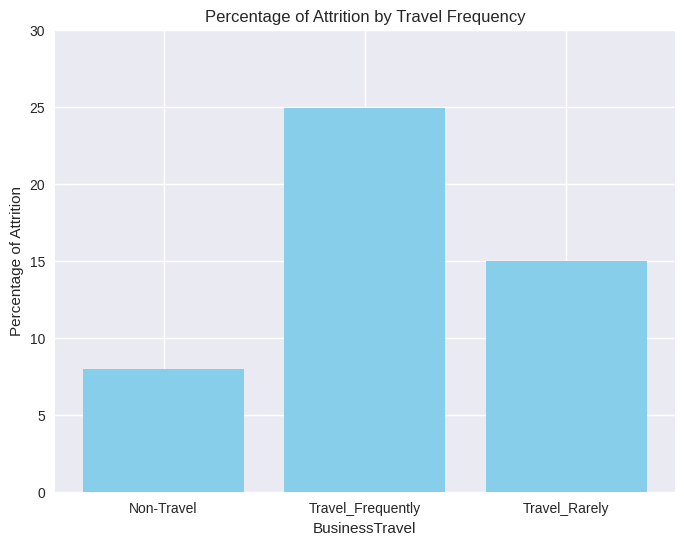

In [ ]:
attrition_percentages = df.groupby('BusinessTravel')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index()
plt.figure(figsize=(8, 6))
plt.bar(attrition_percentages['BusinessTravel'], attrition_percentages['Attrition'], color='skyblue')
plt.title('Percentage of Attrition by Travel Frequency')
plt.xlabel('BusinessTravel')
plt.ylabel('Percentage of Attrition')
plt.ylim(0, 30)
plt.show()

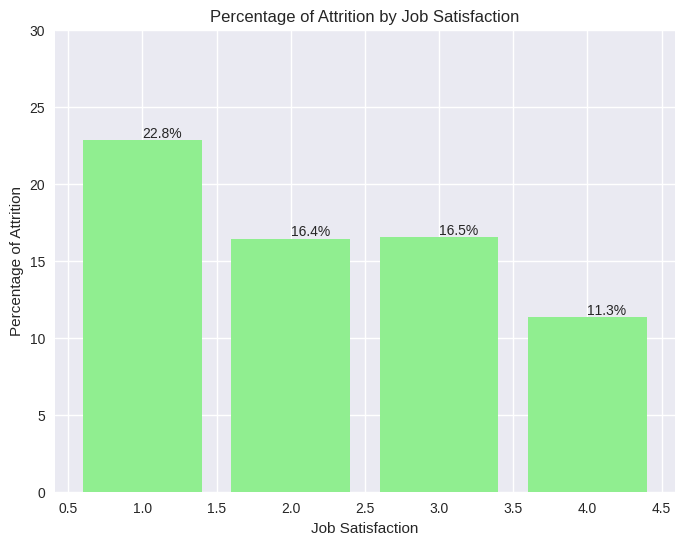

In [ ]:
attrition = df.groupby('JobSatisfaction')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index()

plt.figure(figsize=(8, 6))
bars = plt.bar(attrition['JobSatisfaction'], attrition['Attrition'], color='lightgreen')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f"{yval:.1f}%", va='bottom')

plt.title('Percentage of Attrition by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Percentage of Attrition')
plt.ylim(0, 30)  # Adjust y-axis limits
plt.show()

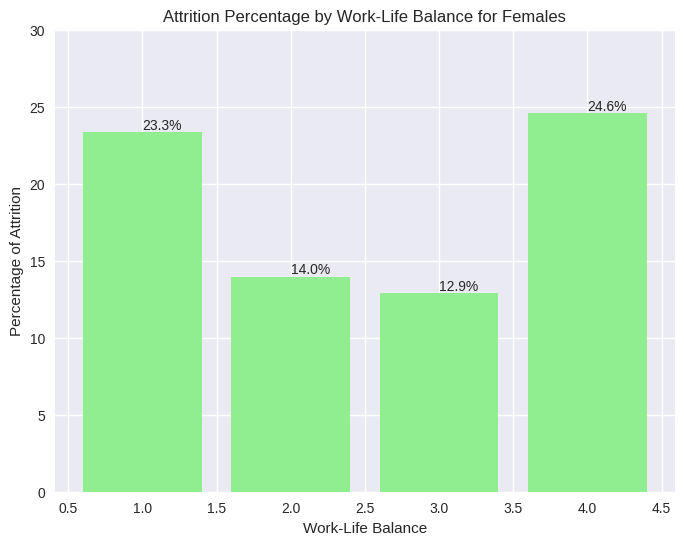

In [ ]:
female_df = df[df['Gender'] == 'Female']

# Calculate percentage of attrition for each work-life balance level for females
attrition_percentages = female_df.groupby('WorkLifeBalance')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index()

# Plotting
plt.figure(figsize=(8, 6))
bars=plt.bar(attrition_percentages['WorkLifeBalance'], attrition_percentages['Attrition'], color='lightgreen')

# Adding percentage labels above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f"{yval:.1f}%", va='bottom')

plt.title('Attrition Percentage by Work-Life Balance for Females')
plt.xlabel('Work-Life Balance')
plt.ylabel('Percentage of Attrition')
plt.ylim(0, 30)  # Adjust y-axis limits
plt.show()

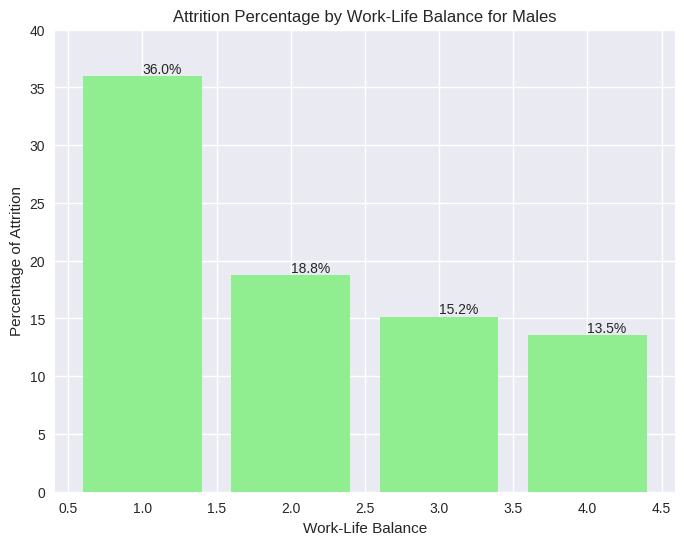

In [ ]:
male_df = df[df['Gender'] == 'Male']

# Calculate percentage of attrition for each work-life balance level for females
attrition_percentages = male_df.groupby('WorkLifeBalance')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index()

# Plotting
plt.figure(figsize=(8, 6))
bars=plt.bar(attrition_percentages['WorkLifeBalance'], attrition_percentages['Attrition'], color='lightgreen')

# Adding percentage labels above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f"{yval:.1f}%", va='bottom')

plt.title('Attrition Percentage by Work-Life Balance for Males')
plt.xlabel('Work-Life Balance')
plt.ylabel('Percentage of Attrition')
plt.ylim(0, 40)  # Adjust y-axis limits
plt.show()

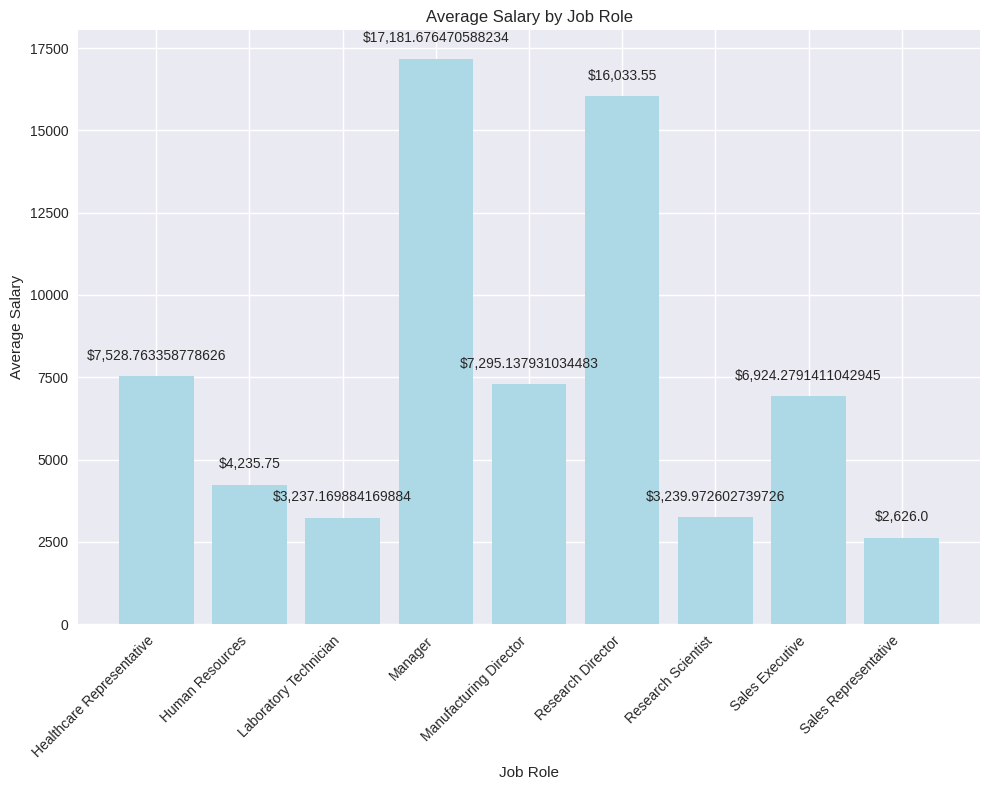

In [ ]:
average_salary = df.groupby('JobRole')['MonthlyIncome'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 8))
plt.bar(average_salary['JobRole'], average_salary['MonthlyIncome'], color='lightblue')

# Adding salary labels above the bars
for index, row in average_salary.iterrows():
    plt.text(row.name, row['MonthlyIncome'] + 500, f"${row['MonthlyIncome']:,}", ha='center')

plt.title('Average Salary by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

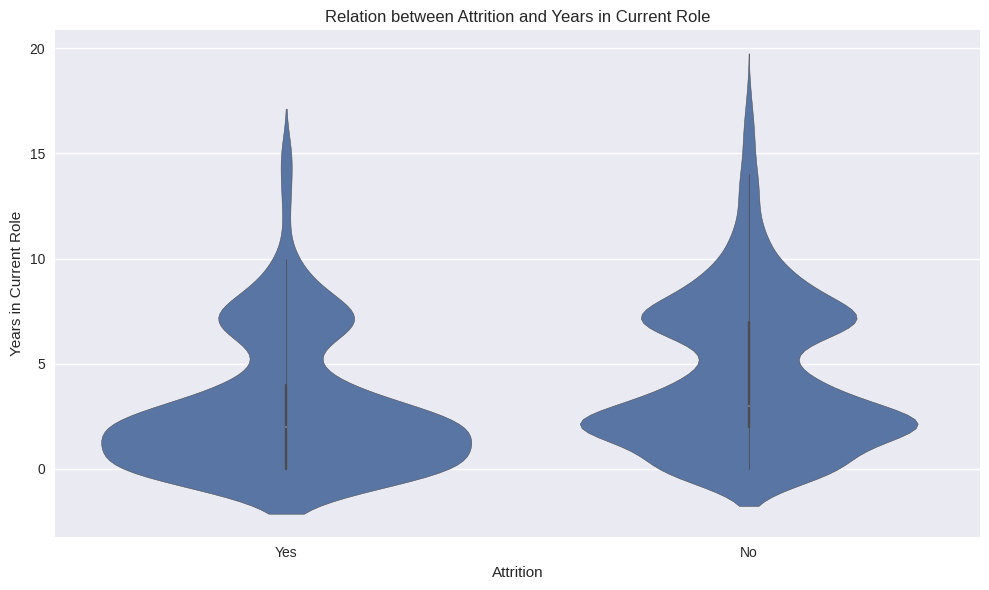

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Attrition', y='YearsInCurrentRole')
plt.title('Relation between Attrition and Years in Current Role')
plt.xlabel('Attrition')
plt.ylabel('Years in Current Role')
plt.tight_layout()
plt.show()

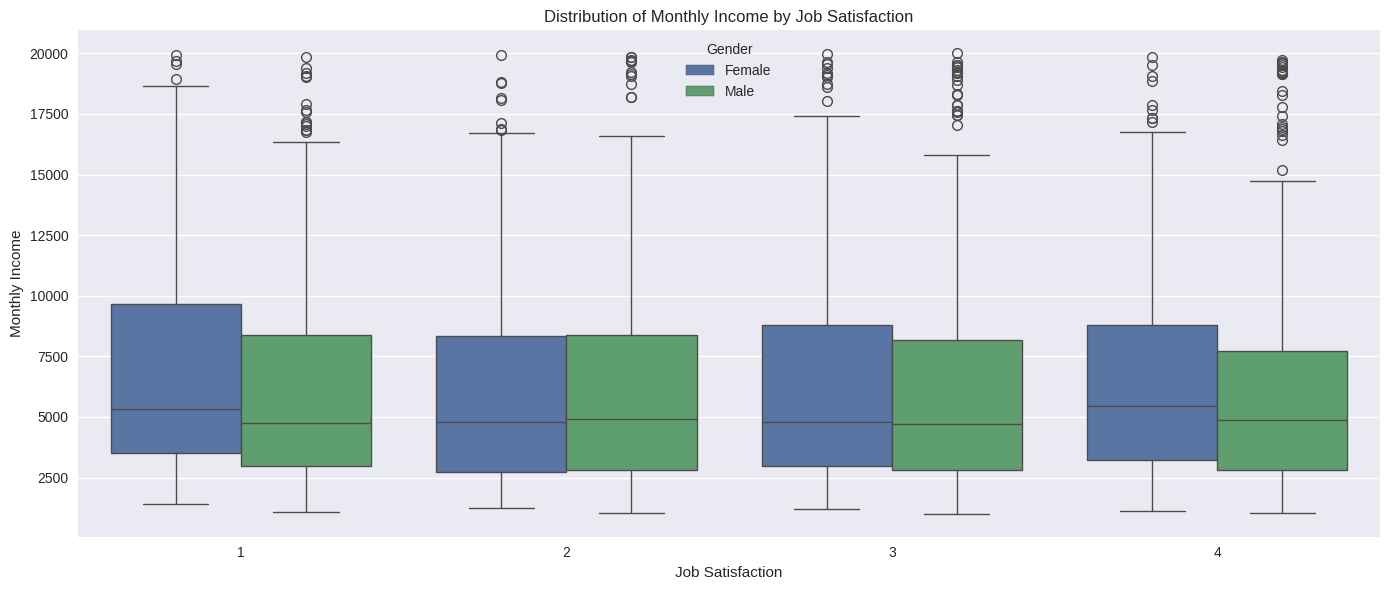

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='JobSatisfaction', y='MonthlyIncome', hue='Gender')
plt.title('Distribution of Monthly Income by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Monthly Income')
plt.tight_layout()
plt.show()

In [ ]:
temp=df.copy()
temp[['MonthlyIncome','JobSatisfaction']].describe()

,MonthlyIncome,JobSatisfaction
count,1470.000000,1470.000000
mean,6502.931293,2.728571
std,4707.956783,1.102846
min,1009.000000,1.000000
25%,2911.000000,2.000000
50%,4919.000000,3.000000
75%,8379.000000,4.000000
max,19999.000000,4.000000


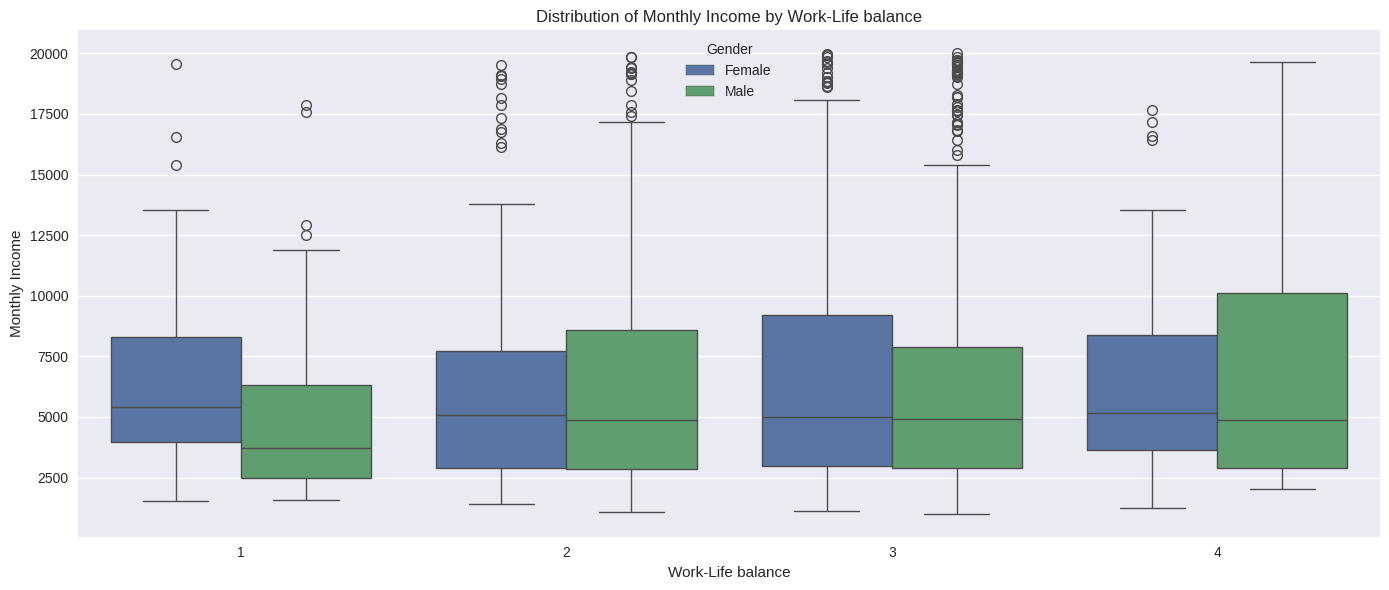

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='WorkLifeBalance', y='MonthlyIncome', hue='Gender')
plt.title('Distribution of Monthly Income by Work-Life balance')
plt.xlabel('Work-Life balance')
plt.ylabel('Monthly Income')
plt.tight_layout()
plt.show()

# Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df_copy=df.copy()
df_copy.drop(columns=['MonthlyIncome','TotalWorkingYears','YearsAtCompany','DistanceFromHome','PercentSalaryHike',
                      'YearsWithCurrManager','YearsInCurrentRole'], inplace=True)

In [ ]:
df_copy.drop(columns=['Over18','StandardHours','EmployeeCount','EmployeeNumber'], inplace=True)

In [ ]:
df_copy.drop(columns=['YearsSinceLastPromotion'], inplace=True)

In [ ]:
df_copy['Attrition'] = df_copy['Attrition'].astype('category').cat.codes

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int8  
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [ ]:
df.drop(columns=['MonthlyIncome','TotalWorkingYears','YearsAtCompany','DistanceFromHome','PercentSalaryHike',
                      'YearsWithCurrManager','YearsInCurrentRole'], inplace=True)

In [ ]:
df.drop(columns=['Over18','StandardHours','EmployeeCount','EmployeeNumber'], inplace=True)

In [ ]:
df.drop(columns=['YearsSinceLastPromotion'], inplace=True)

In [ ]:
df['Attrition'] = df['Attrition'].astype('category').cat.codes

In [ ]:
df['BusinessTravel'] = pd.Categorical(df['BusinessTravel'],categories=['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'],ordered=True)
df['BusinessTravel']

0           Travel_Rarely
1       Travel_Frequently
2           Travel_Rarely
3       Travel_Frequently
4           Travel_Rarely
              ...        
1465    Travel_Frequently
1466        Travel_Rarely
1467        Travel_Rarely
1468    Travel_Frequently
1469        Travel_Rarely
Name: BusinessTravel, Length: 1470, dtype: category
Categories (3, object): ['Non-Travel' < 'Travel_Rarely' < 'Travel_Frequently']

# Modeling

In [ ]:
df_encoded=df.copy()

In [ ]:
df_encoded['BusinessTravel'] = df_encoded['BusinessTravel'].cat.codes
df_encoded['BusinessTravel']

0       1
1       2
2       1
3       2
4       1
       ..
1465    2
1466    1
1467    1
1468    2
1469    1
Name: BusinessTravel, Length: 1470, dtype: int8

In [ ]:
categorical_variables = df_encoded.select_dtypes(include=['object'])
print("Categorical Variables:")
print(categorical_variables.columns.tolist())

Categorical Variables:
['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_variables:
    df_encoded[column + '_Encoded'] = label_encoder.fit_transform(df[column])

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int8  
 2   BusinessTravel            1470 non-null   int8  
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [ ]:
df_encoded.drop(columns=categorical_variables, inplace=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int8 
 2   BusinessTravel            1470 non-null   int8 
 3   DailyRate                 1470 non-null   int64
 4   Education                 1470 non-null   int64
 5   EnvironmentSatisfaction   1470 non-null   int64
 6   HourlyRate                1470 non-null   int64
 7   JobInvolvement            1470 non-null   int64
 8   JobLevel                  1470 non-null   int64
 9   JobSatisfaction           1470 non-null   int64
 10  MonthlyRate               1470 non-null   int64
 11  NumCompaniesWorked        1470 non-null   int64
 12  PerformanceRating         1470 non-null   int64
 13  RelationshipSatisfaction  1470 non-null   int64
 14  StockOptionLevel          1470 non-null 

# Neural Network

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the FFNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=2)

# Make predictions
y_pred = model.predict(X_test)
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

# Compute confusion matrix, precision, and recall
conf_matrix = confusion_matrix(y_test, y_pred_binary)

Epoch 1/20
33/33 - 2s - loss: 230.6686 - accuracy: 0.7143 - 2s/epoch - 52ms/step
Epoch 2/20
33/33 - 0s - loss: 149.3715 - accuracy: 0.7250 - 107ms/epoch - 3ms/step
Epoch 3/20
33/33 - 0s - loss: 101.8150 - accuracy: 0.7143 - 107ms/epoch - 3ms/step
Epoch 4/20
33/33 - 0s - loss: 69.6514 - accuracy: 0.7104 - 119ms/epoch - 4ms/step
Epoch 5/20
33/33 - 0s - loss: 41.3760 - accuracy: 0.7017 - 98ms/epoch - 3ms/step
Epoch 6/20
33/33 - 0s - loss: 25.8614 - accuracy: 0.7172 - 127ms/epoch - 4ms/step
Epoch 7/20
33/33 - 0s - loss: 15.6211 - accuracy: 0.6987 - 111ms/epoch - 3ms/step
Epoch 8/20
33/33 - 0s - loss: 9.5783 - accuracy: 0.7289 - 126ms/epoch - 4ms/step
Epoch 9/20
33/33 - 0s - loss: 4.6251 - accuracy: 0.7454 - 103ms/epoch - 3ms/step
Epoch 10/20
33/33 - 0s - loss: 3.7261 - accuracy: 0.7551 - 109ms/epoch - 3ms/step
Epoch 11/20
33/33 - 0s - loss: 3.1045 - accuracy: 0.7930 - 120ms/epoch - 4ms/step
Epoch 12/20
33/33 - 0s - loss: 1.6713 - accuracy: 0.7959 - 118ms/epoch - 4ms/step
Epoch 13/20
33/33 

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)

# Print the score
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Test Loss: 0.4410684406757355
Test Accuracy: 0.8616780042648315


In [ ]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_binary))

print('\nClassification Report:')
print(classification_report(y_test, y_pred_binary))

Confusion Matrix:
[[380   0]
 [ 61   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.80       441



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:
Accuracy Score: 80.05%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.894595   0.309859  0.800454    0.602227      0.813713
recall       0.871053   0.360656  0.800454    0.615854      0.800454
f1-score     0.882667   0.333333  0.800454    0.608000      0.806682
support    380.000000  61.000000  0.800454  441.000000    441.000000
_______________________________________________
Conf

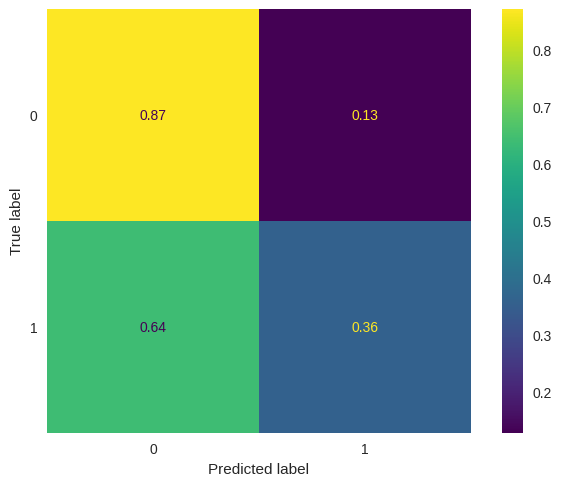

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, tree_clf.predict(X_test), labels=tree_clf.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_)
disp.plot()
plt.grid(False)

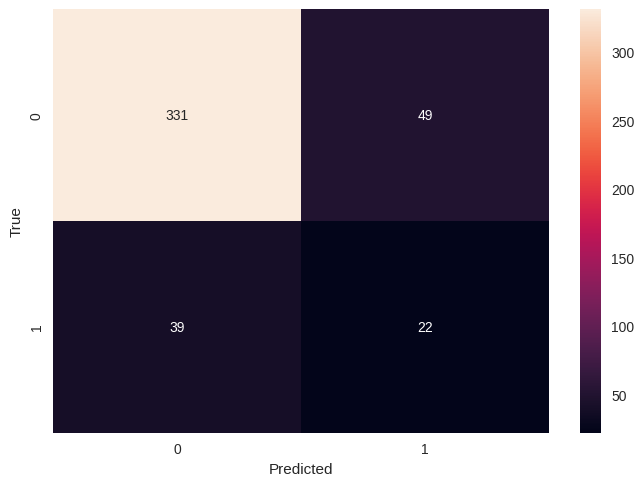

In [ ]:
conf=confusion_matrix(y_test, tree_clf.predict(X_test))
sns.heatmap(conf, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the Naive Bayes model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Compute confusion matrix, precision, recall, accuracy, and F1-score
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# Printing confusion matrix, precision, recall, accuracy, and F1-score
print("Confusion Matrix (Naive Bayes):")
print(conf_matrix_nb)
print("Precision (Naive Bayes):", precision_nb)
print("Recall (Naive Bayes):", recall_nb)
print("Accuracy (Naive Bayes):", accuracy_nb)
print("F1-score (Naive Bayes):", f1_nb)
print('\nClassification Report:')
print(classification_report(y_test, y_pred_nb))

Confusion Matrix (Naive Bayes):
[[368  12]
 [ 46  15]]
Precision (Naive Bayes): 0.5555555555555556
Recall (Naive Bayes): 0.2459016393442623
Accuracy (Naive Bayes): 0.8684807256235828
F1-score (Naive Bayes): 0.3409090909090909

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       380
           1       0.56      0.25      0.34        61

    accuracy                           0.87       441
   macro avg       0.72      0.61      0.63       441
weighted avg       0.84      0.87      0.85       441



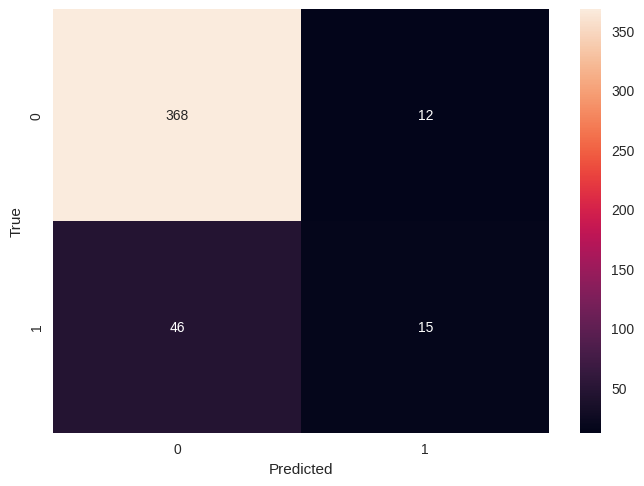

In [ ]:
sns.heatmap(conf_matrix_nb, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

lr_model = LogisticRegression( max_iter = 2000 )
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()

In [ ]:
%timeit lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

299 ms ± 21.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


0.8616780045351474

In [ ]:
%timeit knn_model.fit(X_train, y_train)
knn_model.score(X_test, y_test)

2 ms ± 329 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


0.8321995464852607

# Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


#  Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#  Initialize Model
logistic_model = LogisticRegression(class_weight='balanced')  # Use class_weight='balanced' to handle class imbalance

#  Train Model
logistic_model.fit(X_train, y_train)

#  Make Predictions
y_pred = logistic_model.predict(X_test)

#  Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.6848072562358276
Precision: 0.23648648648648649
Recall: 0.5737704918032787
F1-score: 0.33492822966507174
Confusion Matrix:
[[267 113]
 [ 26  35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       380
           1       0.24      0.57      0.33        61

    accuracy                           0.68       441
   macro avg       0.57      0.64      0.56       441
weighted avg       0.82      0.68      0.73       441



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


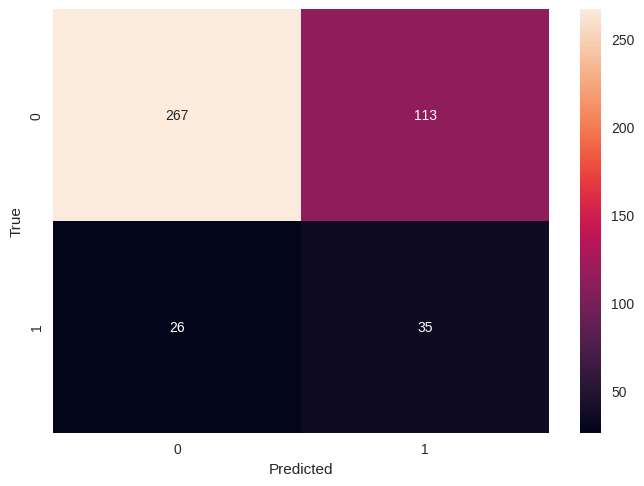

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# K-Nearest Neighbor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Assuming you have preprocessed your data and have features X and target y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Balance the class distribution using SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the KNN classifier with adjusted weights
knn_model = KNeighborsClassifier(weights='distance')

# Train the KNN model
knn_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.5850340136054422
Precision: 0.1534090909090909
Recall: 0.4426229508196721
F1-score: 0.22784810126582278
Confusion Matrix:
[[231 149]
 [ 34  27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.61      0.72       380
           1       0.15      0.44      0.23        61

    accuracy                           0.59       441
   macro avg       0.51      0.53      0.47       441
weighted avg       0.77      0.59      0.65       441



# Experiments

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, np.argmax(y_pred, axis=1))
print(conf_matrix)

14/14 [==============================] - 0s 2ms/step
[[380   0]
 [ 61   0]]


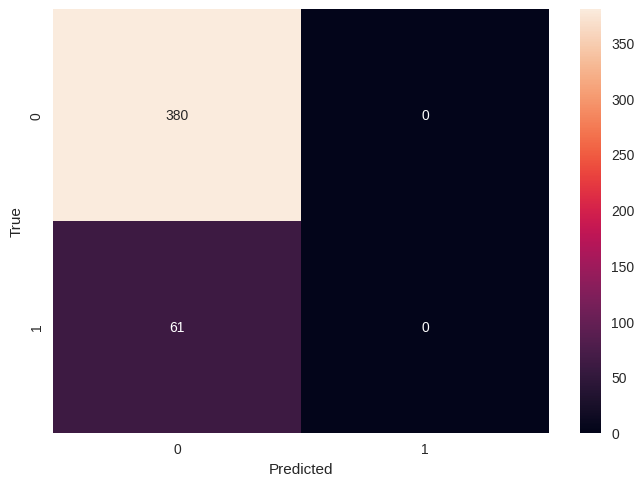

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

# Initialize the SVM model
svm_model = SVC(kernel='rbf', class_weight='balanced')  # 'rbf' kernel is commonly used for non-linear problems

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Compute confusion matrix, precision, and recall
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
# Print confusion matrix, precision, and recall
print("Accuracy (SVM):", accuracy_svm)
print("Confusion Matrix (SVM):")
print(conf_matrix_svm)
print("Precision (SVM):", precision_svm)
print("Recall (SVM):", recall_svm)
print('\nClassification Report:')
print(classification_report(y_test, y_pred_svm))

Accuracy (SVM): 0.5827664399092971
Confusion Matrix (SVM):
[[233 147]
 [ 37  24]]
Precision (SVM): 0.14035087719298245
Recall (SVM): 0.39344262295081966

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.61      0.72       380
           1       0.14      0.39      0.21        61

    accuracy                           0.58       441
   macro avg       0.50      0.50      0.46       441
weighted avg       0.76      0.58      0.65       441



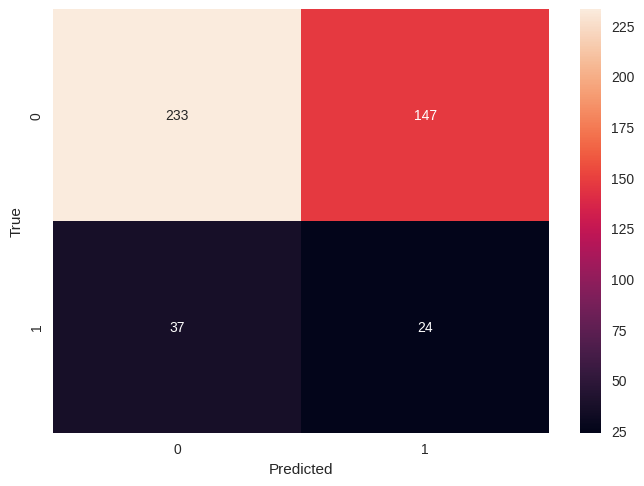

In [ ]:
sns.heatmap(conf_matrix_svm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()